In [39]:
# import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# import our package scikitplot
import scikitplot as skplt

# classifiers
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# import important module to ge balanced data in train data
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

np.random.seed(123)

In [40]:
# load the dataset

data = pd.read_csv("data/data.csv")

data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [41]:
# shape of the data
data.shape

(7160, 14)

In [42]:
# show data columns
data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [43]:
# drop columns are not needed for this tutorial

data = data.drop(["Customer Id", "Geo_Code"], axis=1)

In [44]:
# check new data shape
data.shape

(7160, 12)

In [45]:
# check new data columns
data.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim'],
      dtype='object')

In [46]:
# check variable information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7153 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7054 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   6652 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 671.4+ KB


In [47]:
# check if it contains missing values
data.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Claim                   0
dtype: int64

In [48]:
# imputing for garden column
imp_most_frequent = SimpleImputer(strategy="most_frequent")
imp_most_frequent.fit(data["Garden"].values.reshape(-1, 1))
data["Garden"] = imp_most_frequent.transform(data["Garden"].values.reshape(-1, 1))

# imputing for building dimension column
imp_mean_building_dm = SimpleImputer(strategy="mean")
imp_mean_building_dm.fit(data["Building Dimension"].values.reshape(-1, 1))
data["Building Dimension"] = imp_mean_building_dm.transform(
    data["Building Dimension"].values.reshape(-1, 1)
)

# imputing for Date_of_Occupancy   column
imp_mean_building_dm = SimpleImputer(strategy="mean")
imp_mean_building_dm.fit(data["Date_of_Occupancy"].values.reshape(-1, 1))
data["Date_of_Occupancy"] = imp_mean_building_dm.transform(
    data["Date_of_Occupancy"].values.reshape(-1, 1)
)

In [49]:
# check again if we have missing data
data.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Claim                 0
dtype: int64

In [50]:
# convert object into numbers
scaler = preprocessing.MinMaxScaler()
le = preprocessing.LabelEncoder()

In [51]:
# transoform the data set
data["Residential"] = le.fit_transform(data["Residential"])
data["Building_Painted"] = le.fit_transform(data["Building_Painted"])
data["Building_Fenced"] = le.fit_transform(data["Building_Fenced"])
data["Garden"] = data["Garden"].replace({"O": 0, "V": 1})
data["Settlement"] = le.fit_transform(data["Settlement"])
data["NumberOfWindows"] = le.fit_transform(data["NumberOfWindows"])

In [52]:
# separate target and features
X = data.drop(["Claim"], axis=1)
y = data.Claim

In [53]:
# scale all features
scaler = preprocessing.MinMaxScaler()

X = scaler.fit_transform(X)

In [54]:
# Split the data into 10% validation and 90% training
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

In [55]:
feature_columns = [
    "YearOfObservation",
    "Insured_Period",
    "Residential",
    "Building_Painted",
    "Building_Fenced",
    "Garden",
    "Settlement",
    "Building Dimension",
    "Building_Type",
    "Date_of_Occupancy",
    "NumberOfWindows",
]

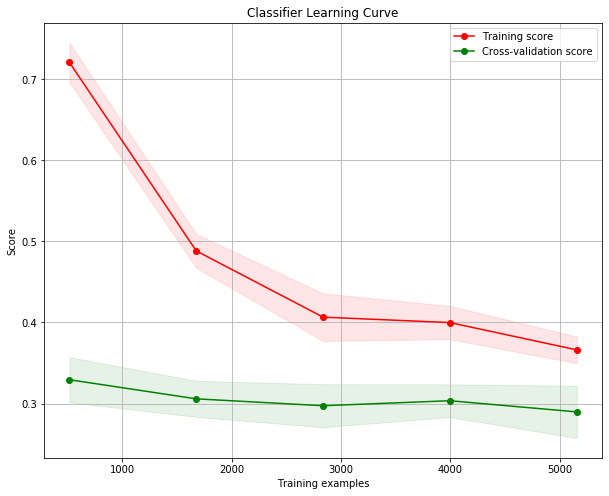

In [56]:
# Training the model with GradientBoostingClassifier

classifier = GradientBoostingClassifier()

skplt.estimators.plot_learning_curve(
    classifier,
    X_train,
    y_train,
    title="Classifier Learning Curve",
    scoring="f1",
    cv=5,
    shuffle=True,
    random_state=42,
    n_jobs=-1,
    figsize=(10, 8),
)

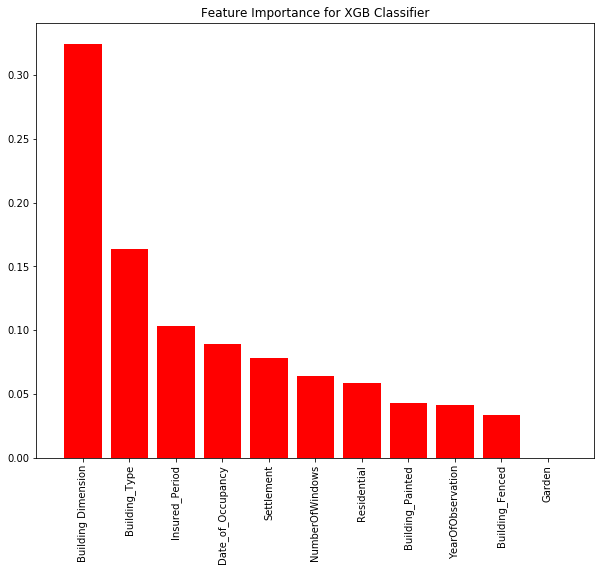

In [57]:
xgb_classifier = XGBClassifier(n_jobs=-1)

# train
xgb_classifier.fit(X_train, y_train)
# Generates a plot of a classifier’s feature importances

skplt.estimators.plot_feature_importances(
    xgb_classifier,
    feature_names=feature_columns,
    figsize=(10, 8),
    title="Feature Importance for XGB Classifier",
    x_tick_rotation=90,
)

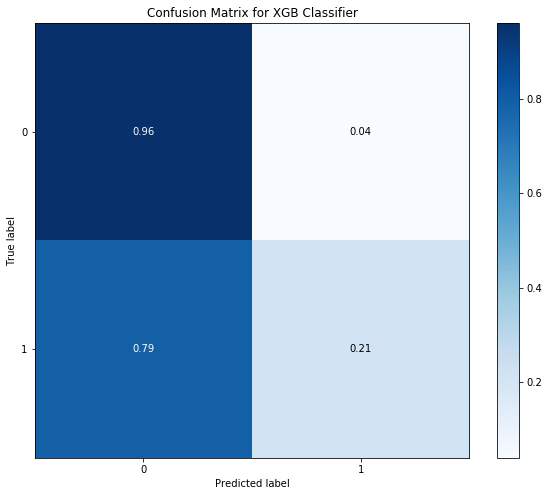

In [58]:
y_pred = xgb_classifier.predict(X_val)

# plot confusion matrix for xgb_classifier
skplt.metrics.plot_confusion_matrix(
    y_val,
    y_pred,
    normalize=True,
    title="Confusion Matrix for XGB Classifier",
    figsize=(10, 8),
)

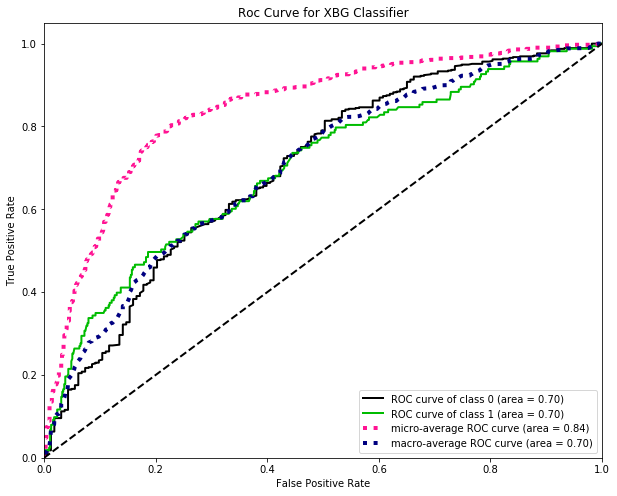

In [59]:
# Generates the ROC curves from labels and predicted scores/probabilities

y_probas = xgb_classifier.predict_proba(X_val)
skplt.metrics.plot_roc(
    y_val, y_probas, title="Roc Curve for XBG Classifier", figsize=(10, 8)
)

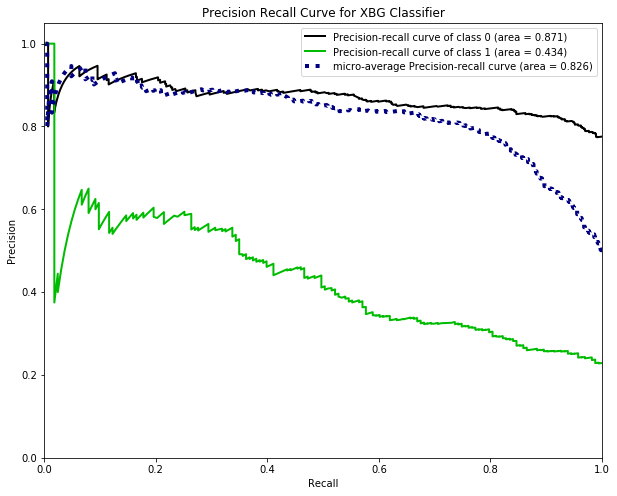

In [60]:
# Generates the Precision Recall Curve from labels and probabilities

skplt.metrics.plot_precision_recall(
    y_val, y_probas, title="Precision Recall Curve for XBG Classifier", figsize=(10, 8)
)

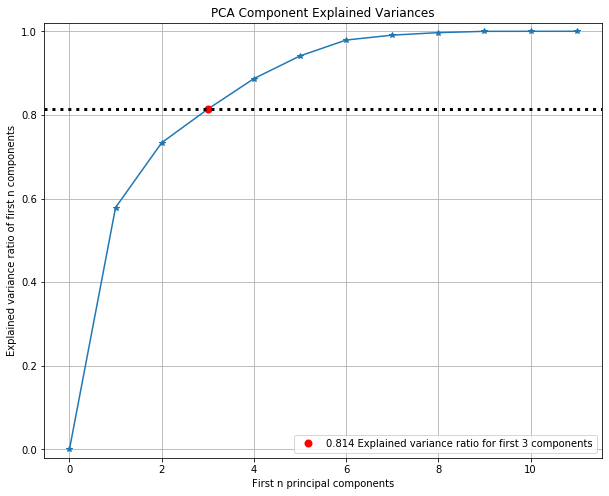

In [61]:
from sklearn.decomposition import PCA

# Plots PCA components’ explained variance ratios.
pca = PCA(random_state=42)

# train
pca.fit(X_train)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(10, 8))

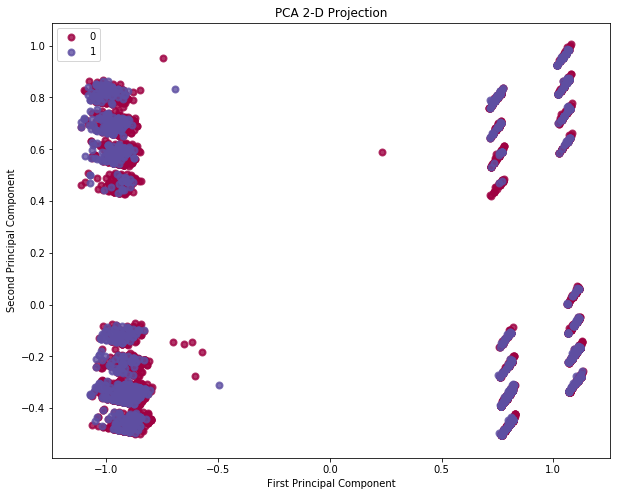

In [62]:
# Plots the 2-dimensional projection of PCA on a given dataset.
skplt.decomposition.plot_pca_2d_projection(
    pca, X_train, y_train, figsize=(10, 8), biplot=False
)

**Resources:**

* [smote and adasyn handling imbalanced data](https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167)
* [tactics to combat imbalanced classes](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)